# Ayudantía 1

## Introducción a Numpy

Acceder a este [notebook](https://colab.research.google.com/drive/1PTXIX4xM2uNT5vGT5J-VOab9nHyLo0iO?usp=sharing)

## Repaso señales y sistemas

### Propiedas transformada de Fourier


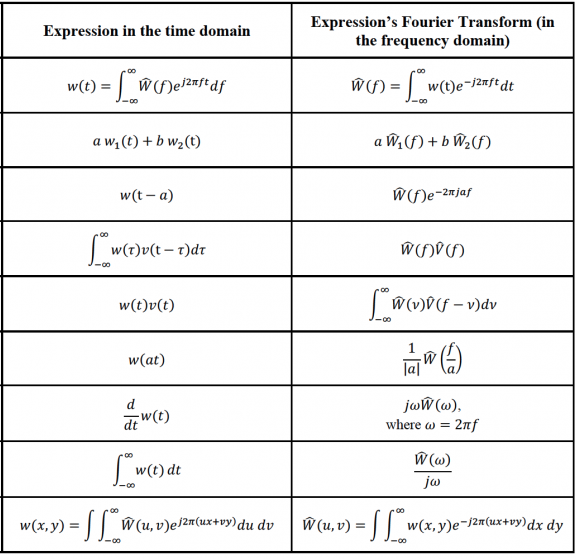

### Ejercicio













Encuentre la transformada de Fourier de

$$\operatorname{rect}\left(\frac{t}{a}\right)=\Pi\left(\frac{t}{a}\right)= \begin{cases}0, & \text { if }|t|>\frac{a}{2} \\ \frac{1}{2}, & \text { if }|t|=\frac{a}{2} \\ 1, & \text { if }|t|<\frac{a}{2}\end{cases}$$







## Transforma de Fourier discreta (DFT)



In [1]:
import matplotlib.pyplot as plt
import numpy as np

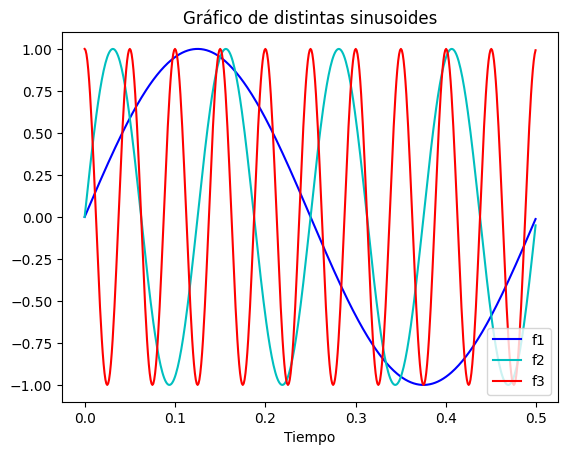

In [2]:
# Definimos las frecuencias de cada sinusoide
f1 = 2
f2 = 8
f3 = 20

Fs = 1000
t1 = np.arange(0, 0.5,1/Fs) #dominio de las funciones

# Definimos 3 funciones
func1 = np.sin(2*np.pi*f1*t1)
func2 = np.sin(2*np.pi*f2*t1)
func3 = np.cos(2*np.pi*f3*t1)

# gráfica
plt.plot(t1,func1, 'b', label='f1')
plt.plot(t1,func2, 'c', label='f2')
plt.plot(t1,func3, 'r', label='f3')
plt.legend(loc='lower right')
plt.title('Gráfico de distintas sinusoides')
plt.xlabel('Tiempo')

plt.show()

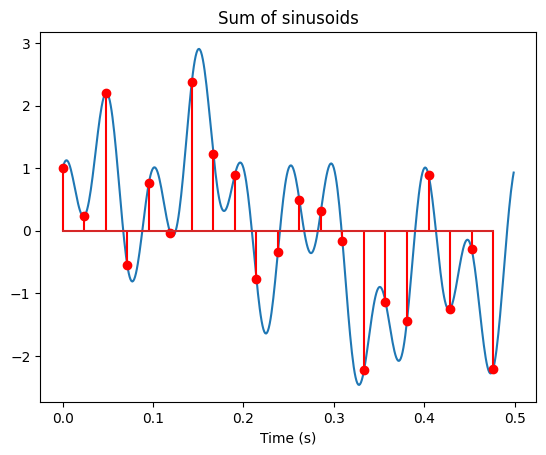

In [3]:
# Creación de señal por la suma de las sinusoides
signal = np.sin(2*np.pi*f1*t1) + np.sin(2*np.pi*f2*t1) + np.cos(2*np.pi*f3*t1)

Fs = 42
t = np.arange(0,0.5,1/Fs)
discrete_signal = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t) + np.cos(2*np.pi*f3*t)
#gráfico de la señal creada
plt.plot(t1,signal,label='continuous')
#plt.scatter(t,discrete_signal,label='discrete',color='r')
plt.stem(t,discrete_signal,label='discrete',markerfmt='or',linefmt='-r')
plt.title('Sum of sinusoids')
plt.xlabel('Time (s)')
plt.show()

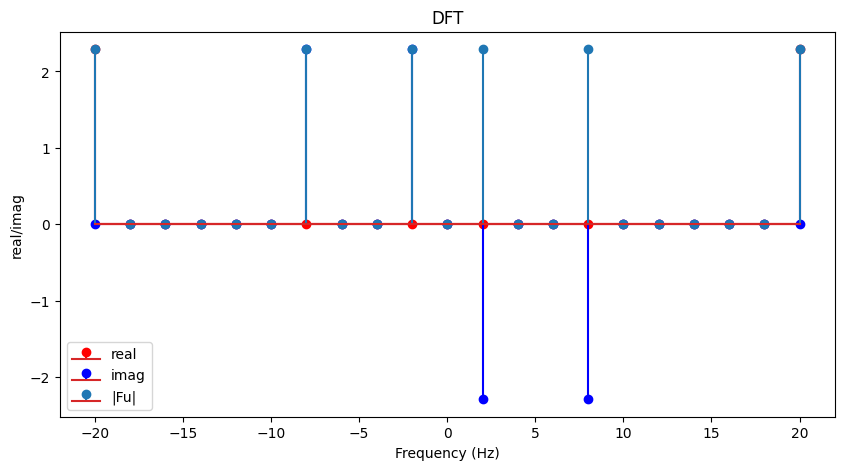

In [4]:
plt.figure(figsize=(10,5))

N = discrete_signal.shape[0]
k = np.fft.fftshift(np.fft.fftfreq(N,1/Fs))
Fu = np.fft.fftshift(np.fft.fft(discrete_signal, norm='ortho'))

plt.stem(k,np.real(Fu),label='real',markerfmt='or',linefmt='-r')
plt.stem(k,np.imag(Fu),label='imag',markerfmt='ob',linefmt='-b')
plt.stem(k,np.abs(Fu),label='|Fu|')
plt.title('DFT')
plt.ylabel('real/imag')
plt.xlabel('Frequency (Hz)')
plt.legend()



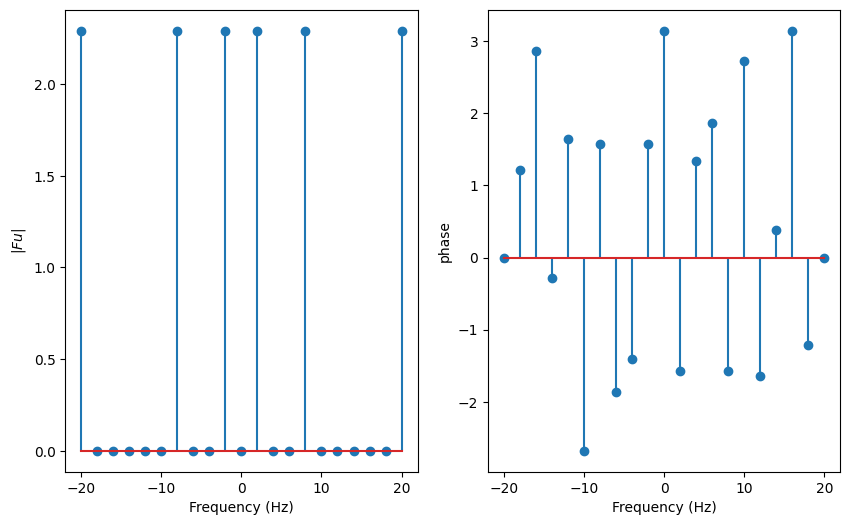

In [5]:
fig,ax = plt.subplots(1,2,figsize=(10,6))
ax[0].stem(k,np.abs(Fu),label='$|Fu|$')
ax[0].set_ylabel('$|Fu|$')
ax[0].set_xlabel('Frequency (Hz)');

ax[1].stem(k,np.angle(Fu),label='phase Fu')
ax[1].set_ylabel('phase')
ax[1].set_xlabel('Frequency (Hz)');

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:3377: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


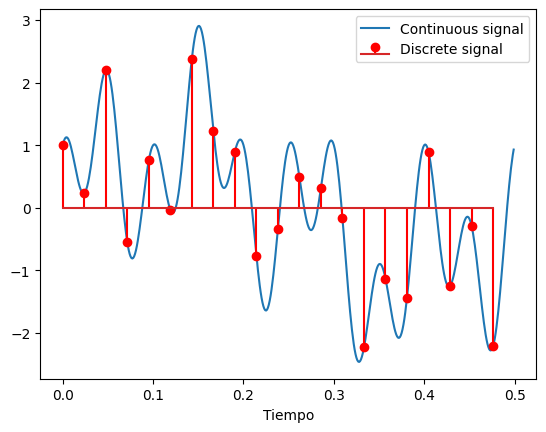

In [6]:
Recon_signal = np.fft.ifft(np.fft.ifftshift(Fu), norm='ortho')

plt.plot(t1,signal,label='Continuous signal')
plt.stem(t,Recon_signal,label='Discrete signal',markerfmt='or',linefmt='-r')
plt.xlabel('Tiempo')
plt.legend()
plt.show()

In [7]:
def sinc_interp(x, s, u):
    """
    Interpolates x, sampled at "s" instants
    Output y is sampled at "u" instants ("u" for "upsampled")

    from Matlab:
    http://phaseportrait.blogspot.com/2008/06/sinc-interpolation-in-matlab.html
    """

    if len(x) != len(s):
        raise  'x and s must be the same length'

    # Find the period
    T = s[1] - s[0]

    sincM = np.tile(u, (len(s), 1)) - np.tile(s[:, np.newaxis], (1, len(u)))
    y = np.dot(x, np.sinc(sincM/T))
    return y

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


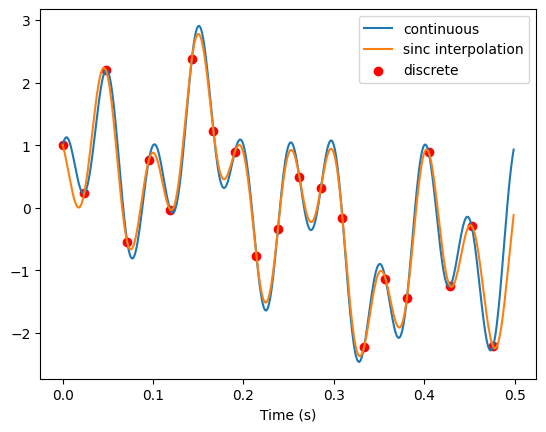

In [8]:

Sinc_recon = sinc_interp(Recon_signal,t,t1)

plt.plot(t1,signal,label='continuous')
plt.plot(t1,Sinc_recon,label='sinc interpolation')
#plt.stem(t,Recon_signal,label='discrete',markerfmt='or',linefmt='-r')
plt.scatter(t,Recon_signal,label='discrete',color='r')
plt.xlabel('Time (s)')
plt.legend()
plt.show()


## Integración numérica con Scipy

### Ejercicio 1

Evalúe la integral

$$
\int_{-1}^{1} \frac{1}{\sigma \sqrt{2 \pi}} \exp \left(-\frac{1}{2} \frac{(x-\mu)^2}{\sigma^2}\right) dx
$$

para $\sigma=1$ y $\mu=0$

#### Solución

In [9]:
def gauss(x,sigma=1,mu=0):

  return (1/(sigma*np.sqrt(2*np.pi))) * (np.exp((-0.5) * ((x - mu)**2)/sigma**2))

In [10]:
import scipy.integrate as scint

I = scint.quad(lambda x : gauss(x), -1, 1)[0]

print(f"Integral {I:.3f}")

Integral 0.683


### Ejercicio 2

Calcule la función



$$
CI(l) = \int_{-l}^{l} \frac{1}{\sigma \sqrt{2 \pi}} \exp \left(-\frac{1}{2} \frac{(x-\mu)^2}{\sigma^2}\right) dx
$$

para $l \in [0,5]$

#### Solución

Text(0, 0.5, 'CI')

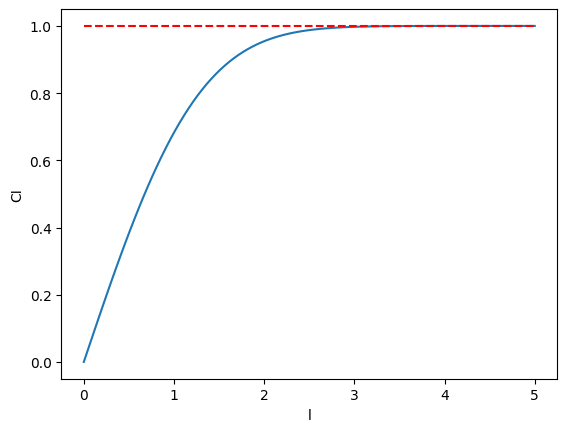

In [11]:
l = np.linspace(0,5,100)

CI = np.array([ scint.quad(lambda x : gauss(x), -_l, _l)[0] for _l in l ])

plt.plot(l,CI)
plt.hlines(1,0,5,'r',linestyles='dashed')
plt.xlabel('l')
plt.ylabel('CI')


**Nota**: para funciones que utilizan complejos (como la tarea) utilicen `complex_func=True` en scint.quad()

